In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
dataset = pd.read_csv('/Users/xinyuewang/Downloads/no_0_solar_with_interpolation.csv')

In [3]:
dataset.columns

Index(['Unnamed: 0', 'Date', 'hhmm', 'DHI', 'DNI', 'GHI', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point',
       'Solar Zenith Angle', 'Fill Flag', 'Surface Albedo', 'Wind Speed',
       'Precipitable Water', 'Wind Direction', 'Relative Humidity',
       'Temperature', 'Pressure', 'Solar', 'Normalized_Solar_lin',
       'Normalized_Solar_geom', 'Normalized_Solar'],
      dtype='object')

In [4]:
dataset.describe()

,Unnamed: 0,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,...,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Solar,Normalized_Solar_lin,Normalized_Solar_geom,Normalized_Solar
count,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,...,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,5.146900e+04,5.146900e+04,5.146900e+04
mean,48352.763741,142.666207,362.723367,375.057394,106.063592,590.835668,489.294216,2.845402,16.857473,57.715805,...,2.175863,3.309082,167.285972,70.439983,23.629979,1010.325050,64.833773,1.133411e-01,1.161682e-01,8.959697e-02
std,26629.263632,119.960168,343.449828,302.558076,65.300187,301.153925,321.176407,3.008159,7.353329,25.699414,...,1.078076,1.444461,91.268884,18.528721,7.431762,5.936796,84.404413,7.610893e-02,7.842858e-02,6.060831e-02
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.600000,6.490000,...,0.000000,0.252000,0.000000,18.500000,-3.000000,990.000000,0.000001,5.382131e-10,5.382131e-10,5.382131e-10
25%,25314.000000,59.000000,5.000000,92.000000,68.000000,443.000000,199.000000,0.000000,12.800000,39.130000,...,1.400000,2.105000,117.200000,56.420000,19.000000,1010.000000,8.656580,4.267897e-02,4.343957e-02,3.365899e-02
50%,49180.000000,116.000000,281.000000,332.000000,109.000000,705.000000,538.000000,2.000000,19.000000,55.760000,...,2.000000,3.498000,160.000000,71.420000,25.000000,1010.000000,26.028876,1.191304e-01,1.218217e-01,9.430417e-02
75%,72920.000000,199.000000,714.000000,627.000000,146.000000,814.000000,767.000000,6.000000,23.000000,75.100000,...,2.800000,4.436000,203.200000,85.440000,29.000000,1010.000000,84.315865,1.742050e-01,1.781404e-01,1.359271e-01
max,90508.000000,507.000000,1023.000000,1066.000000,498.000000,1023.000000,1066.000000,9.000000,27.100000,169.450000,...,7.000000,7.169000,360.000000,100.000000,41.000000,1039.000000,356.877620,3.102997e-01,3.210846e-01,2.510412e-01


In [5]:
dataset.isnull().any()

Unnamed: 0               False
Date                     False
hhmm                     False
DHI                      False
DNI                      False
GHI                      False
Clearsky DHI             False
Clearsky DNI             False
Clearsky GHI             False
Cloud Type               False
Dew Point                False
Solar Zenith Angle       False
Fill Flag                False
Surface Albedo           False
Wind Speed               False
Precipitable Water       False
Wind Direction           False
Relative Humidity        False
Temperature              False
Pressure                 False
Solar                    False
Normalized_Solar_lin     False
Normalized_Solar_geom    False
Normalized_Solar         False
dtype: bool

In [6]:
columns=['Relative Humidity', 'Solar Zenith Angle', 'GHI']

In [7]:
global y 
y=dataset['Normalized_Solar']

In [8]:
def multilinear_regression_feature_selection(columns):
    X = dataset[columns]
    y = dataset['Normalized_Solar']
    plt.figure(figsize=(15,10))
    plt.tight_layout()
    seabornInstance.distplot(dataset['Normalized_Solar'])
    #split to train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = LinearRegression() 
    #fit train data
    regressor.fit(X_train, y_train)
    regressor.coef_
    #get coeff from fit
    coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']) 
    #predict test data
    y_pred = regressor.predict(X_test)
    #df for test data with predict and actual
    df = pd.DataFrame({'Predict': y_pred,'Actual': y_test})
    #show only first 25 rows
    df1 = df.head(25)
    df1
    df1.plot(kind='bar',figsize=(10,8))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()
    #calculate normalized diff(%) and diff between predict and actual from test data 
    diff = []
    diff_abs=[]
    for i in range(len(df)):
        diff.append((df.iloc[i][0]-df.iloc[i][1])/(df.iloc[i][0])*100)
        diff_abs.append((df.iloc[i][0]-df.iloc[i][1]))
    diff
    diff_abs
    df_diff = pd.DataFrame({'diff': diff})
    df_diff_abs = pd.DataFrame({'diff_abs': diff_abs})
    df_diff_index = df_diff.reset_index()
    df_diff_abs_index = df_diff_abs.reset_index()
    fig, (ax1,ax2) = plt.subplots(2, figsize=(12,8))
    fig.subplots_adjust(hspace=0.5)
    ax1.scatter(df_diff_index.index, df_diff_index['diff'])
    ax1.set_title("diff(%)")
    ax2.scatter(df_diff_abs_index.index, df_diff_abs_index['diff_abs'])
    ax2.set_title("diff_abs")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R Squared Error:', r2_score(y_test, y_pred))
    return coeff_df

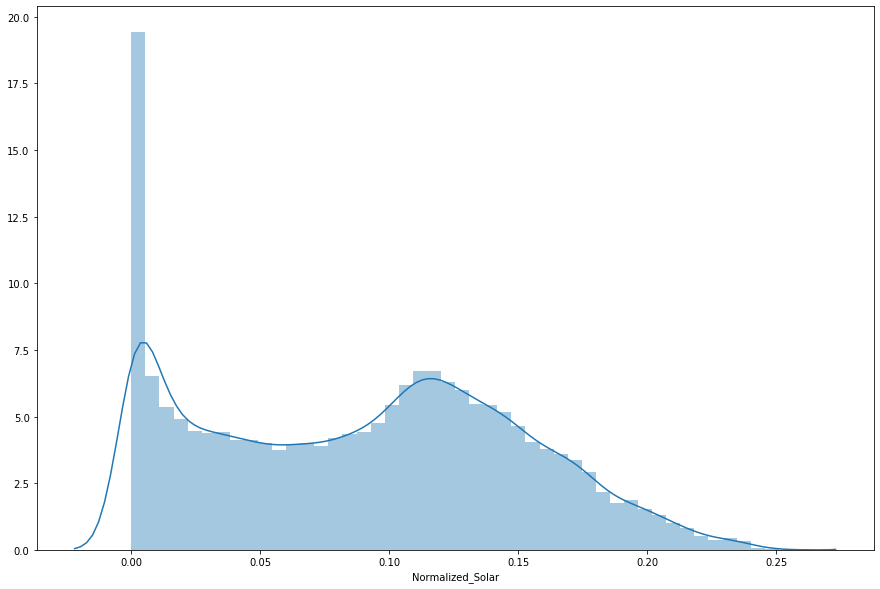

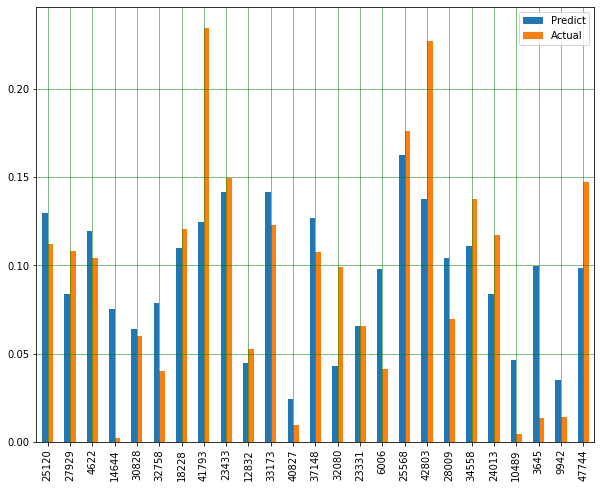

Mean Absolute Error: 0.036747744744629426
Mean Squared Error: 0.0020926705698924635
Root Mean Squared Error: 0.04574571641030954
R Squared Error: 0.4329338011517678


,Coefficient
Relative Humidity,-0.001222
Solar Zenith Angle,-0.000660
GHI,0.000019


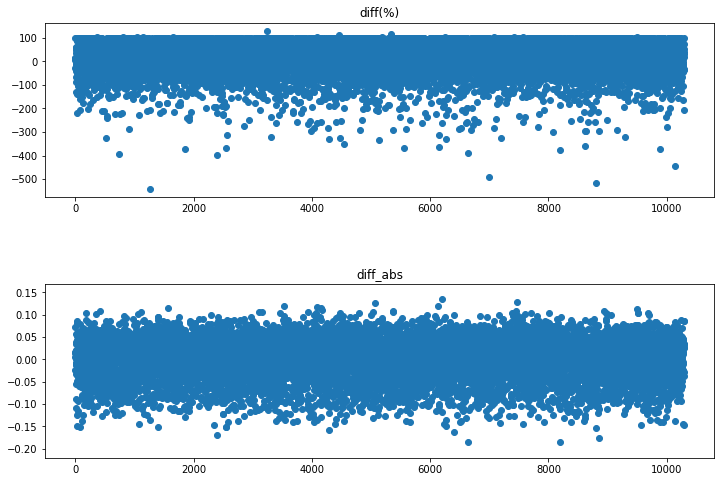

In [9]:
multilinear_regression_feature_selection(columns)

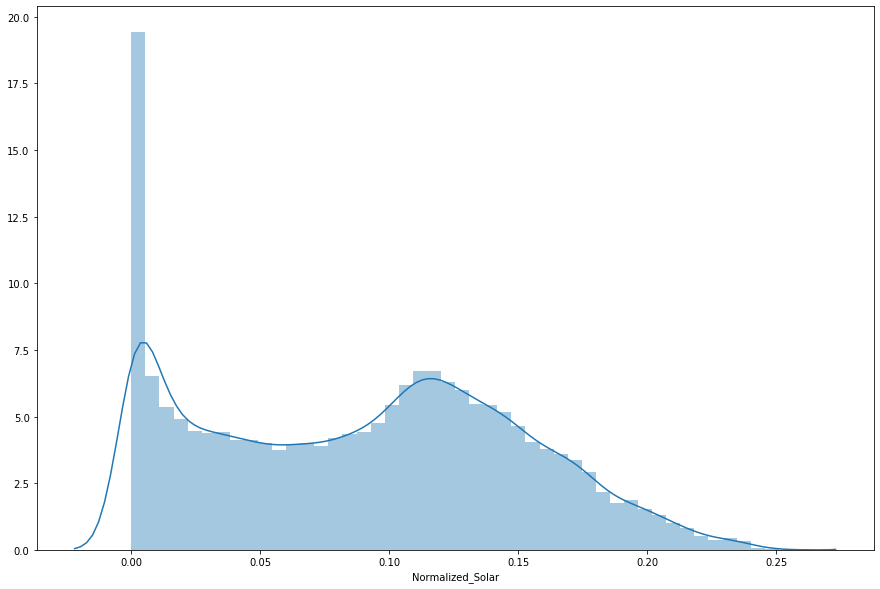

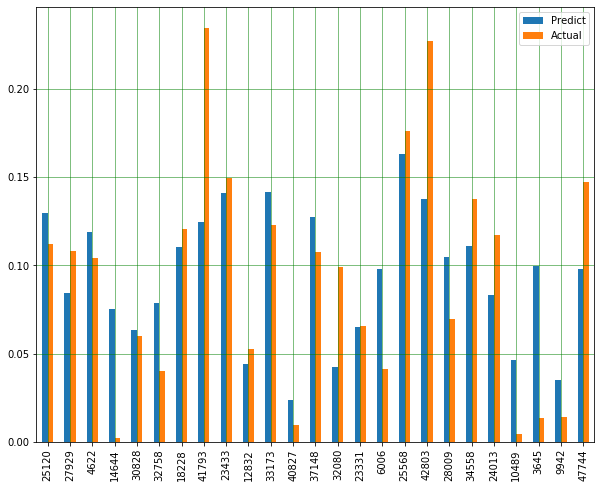

Mean Absolute Error: 0.03674234983317
Mean Squared Error: 0.002091952595909449
Root Mean Squared Error: 0.04573786829214332
R Squared Error: 0.43312835579561737


,Coefficient
Relative Humidity,-0.001223
Solar Zenith Angle,-0.000663
GHI,0.000019
Surface Albedo,-0.031616


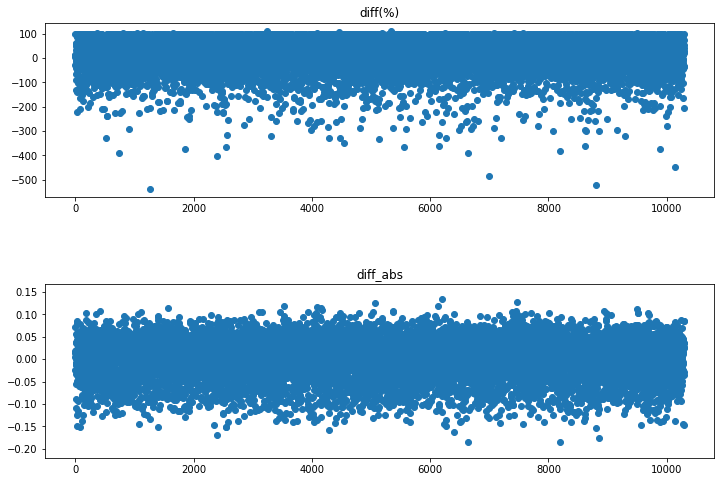

In [10]:
multilinear_regression_feature_selection(['Relative Humidity', 'Solar Zenith Angle', 'GHI','Surface Albedo'])

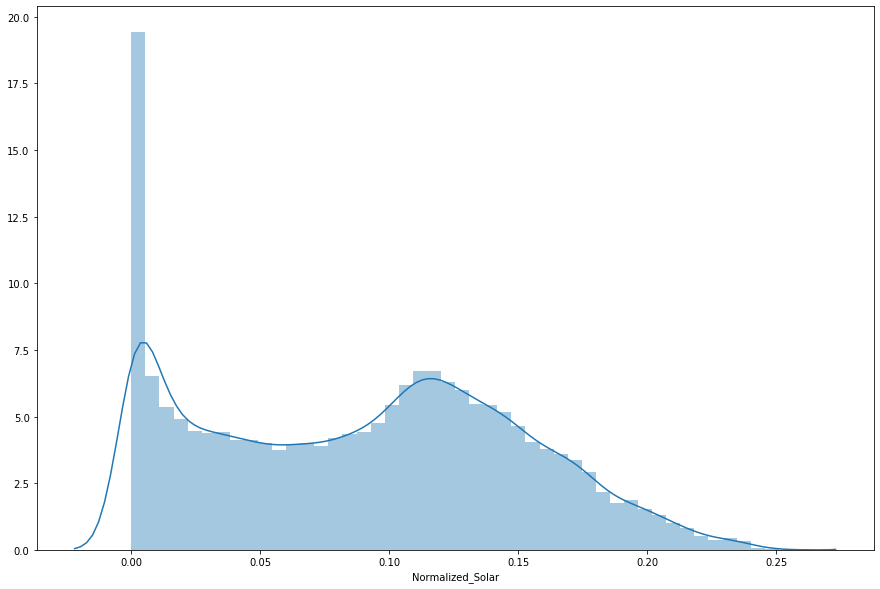

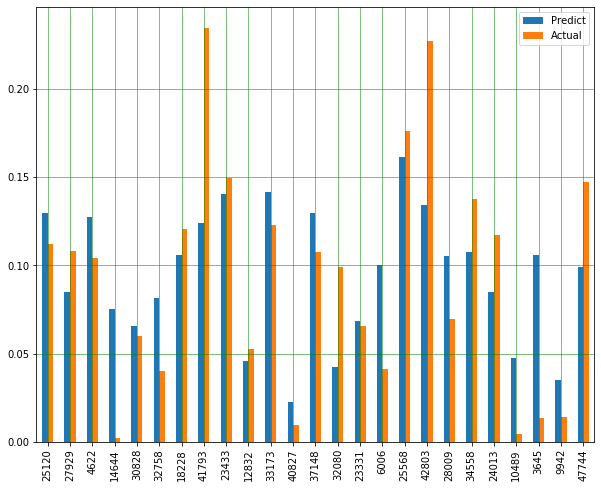

Mean Absolute Error: 0.03665176451530863
Mean Squared Error: 0.002092304318371268
Root Mean Squared Error: 0.045741713111461704
R Squared Error: 0.4330330469962571


,Coefficient
Relative Humidity,-0.001332
Solar Zenith Angle,-0.000802


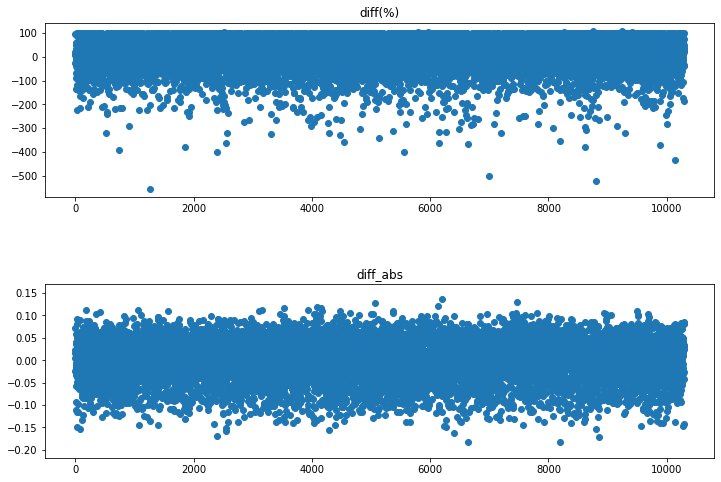

In [11]:
multilinear_regression_feature_selection(['Relative Humidity','Solar Zenith Angle'])

In [12]:
columns_all= ['DHI', 'DNI', 'GHI', 'Cloud Type', 'Dew Point', 
             'Solar Zenith Angle', 'Surface Albedo', 'Wind Speed', 
             'Wind Direction', 'Relative Humidity', 'Temperature', 'Pressure']

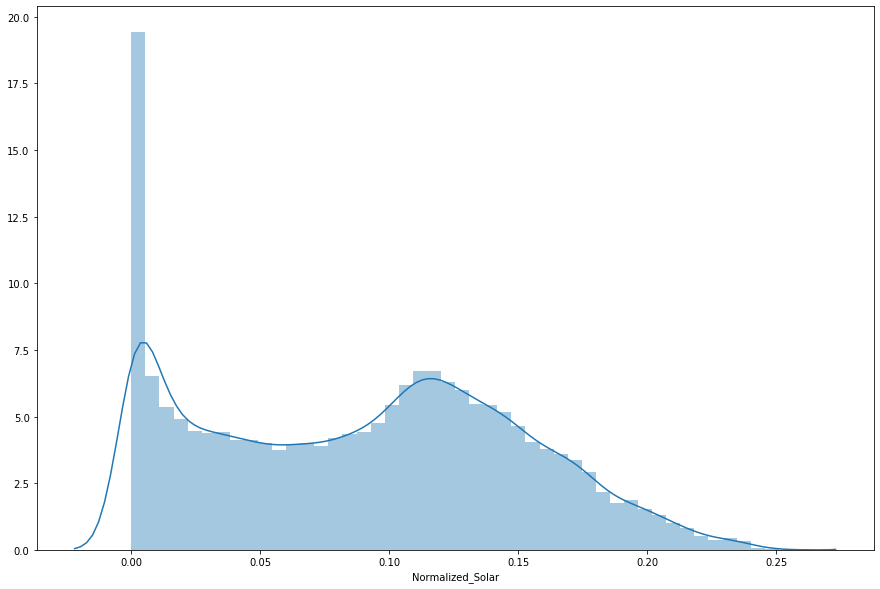

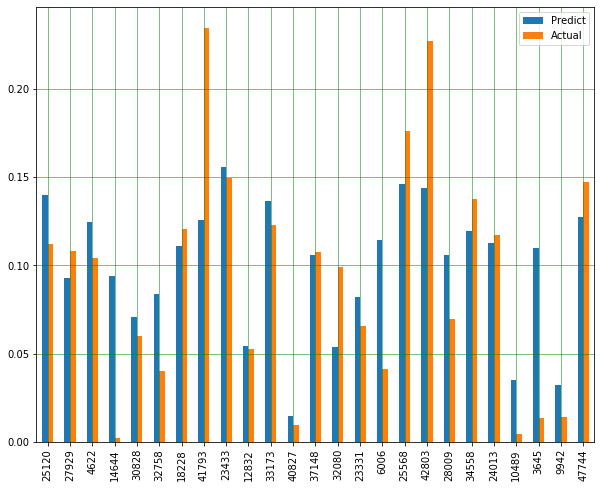

Mean Absolute Error: 0.034234502480249764
Mean Squared Error: 0.0019068051716823991
Root Mean Squared Error: 0.043666980336203684
R Squared Error: 0.48329910297077816


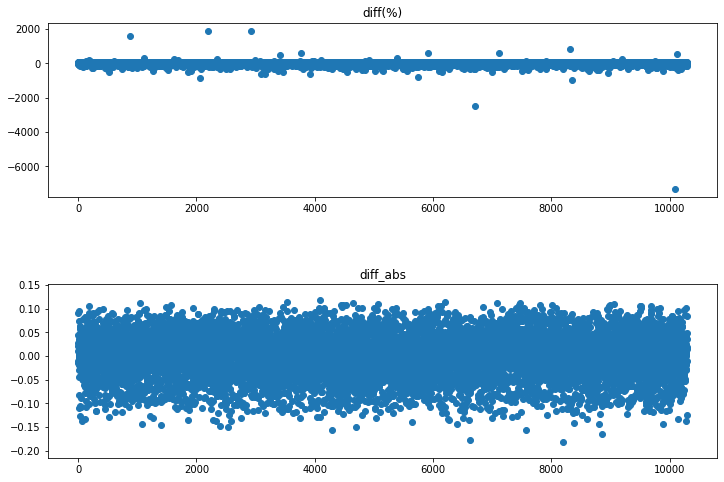

In [13]:
all_coefficent=multilinear_regression_feature_selection(columns_all)

In [14]:
all_coefficent

,Coefficient
DHI,0.000017
DNI,0.000060
GHI,-0.000061
Cloud Type,0.000897
Dew Point,0.005768
Solar Zenith Angle,-0.000878
Surface Albedo,-0.093418
Wind Speed,-0.000817
Wind Direction,0.000024
Relative Humidity,-0.002599


In [15]:
all_coefficent.rank()

,Coefficient
DHI,8.0
DNI,10.0
GHI,7.0
Cloud Type,11.0
Dew Point,12.0
Solar Zenith Angle,5.0
Surface Albedo,1.0
Wind Speed,6.0
Wind Direction,9.0
Relative Humidity,3.0


In [16]:
np.array(dataset['Surface Albedo'])

array([0.143, 0.143, 0.143, ..., 0.14 , 0.14 , 0.14 ])

From Random Forest result:\
Feature ranking:\
Relative Humidity 1. feature 9 (0.346642)\
Solar Zenith Angle 2. feature 5 (0.149772)\
GHI 3. feature 2 (0.090975)\
Surface Albedo 4. feature 6 (0.083799)\
Wind Direction 5. feature 8 (0.078191)\
Temperature 6. feature 10 (0.052759)\
Wind Speed 7. feature 7 (0.047079)\
DNI 8. feature 1 (0.037362)\
DHI 9. feature 0 (0.032601)\
Dew Point 10. feature 4 (0.032295)\
Pressure 11. feature 11 (0.031303)\
Cloud Type 12. feature 3 (0.017221)

K-fold cross-validation

In [18]:
X_columns_all= dataset[columns_all]
X_columns_all

,DHI,DNI,GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Wind Direction,Relative Humidity,Temperature,Pressure
0,13,0,13,4,10.0,82.67,0.143,2.9,355.2,96.35,11.0,1010.0
1,65,0,65,8,10.0,77.27,0.143,3.0,355.2,96.38,11.0,1010.0
2,10,0,10,7,10.0,72.18,0.143,3.3,1.7,96.05,11.0,1010.0
3,14,0,14,8,10.0,67.46,0.143,3.3,1.7,96.08,11.0,1010.0
4,31,0,31,4,10.0,63.22,0.143,3.4,5.4,89.10,12.0,1010.0
...,...,...,...,...,...,...,...,...,...,...,...,...
51464,103,228,166,7,10.5,73.86,0.140,0.7,252.0,87.95,12.4,1012.0
51465,65,111,86,7,10.5,79.03,0.140,0.7,237.0,90.88,11.9,1012.0
51466,30,52,35,4,9.2,84.45,0.140,0.8,222.0,86.49,11.4,1013.0
51467,5,27,5,7,9.2,89.79,0.140,0.8,222.0,86.49,11.4,1013.0


In [19]:
from sklearn.model_selection import KFold

example for 3 feature (X for 3 feature)

KFold(n_splits=10, random_state=None, shuffle=True)
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   12    29    41 ... 51433 51446 51448]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [    9    13    14 ... 51414 51418 51437]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [    6    11    20 ... 51445 51459 51463]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   16    17    38 ... 51454 51457 51461]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   30   121   153 ... 51452 51460 51465]
TRAIN: [    0     1     2 ... 51465 51466 51467] TEST: [    8    21    24 ... 51447 51453 51468]
TRAIN: [    0     2     4 ... 51466 51467 51468] TEST: [    1     3     7 ... 51444 51458 51464]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [    4    18    39 ... 51425 51455 51462]
TRAIN: [    0     1     3 ... 51466 51467 51468] TEST: [    2     5    15 ... 51421 51428 51456]
TRAIN: [    1     2     3 ... 51464 51465 51468] TEST: [    0    10    79 .

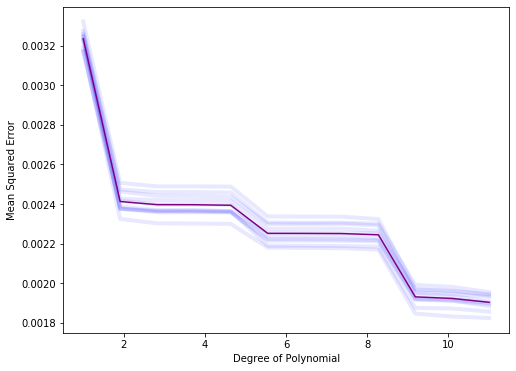

In [20]:
kf = KFold(n_splits=10, shuffle=True)# Define the split - into 10 folds 
kf.get_n_splits(X_columns_all, y)# returns the number of splitting iterations in the cross-validator
print(kf) 
fig, ax = plt.subplots(figsize=(8,6))

mse = np.zeros((12, 10))
j = 0
#creat train and test vars 
for train_index, test_index in kf.split(X_columns_all, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    #print("x-train[X_train.columns[0:2]]: ", X_train[X_train.columns[0:2].values])
    #print (X_train.shape, y_train.shape)
    #print (X_test.shape, y_test.shape)
    X_train, X_test = X_columns_all.iloc[train_index], X_columns_all.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for i in range(1, 13):
        reg = LinearRegression().fit(X_train[X_train.columns[0:i].values], y_train)#use first i features train 
        y_pred = reg.predict(X_test[X_test.columns[0:i].values])

        mse[i-1, j] = metrics.mean_squared_error(y_test, y_pred)

    
    ax.plot(np.linspace(1, 11, 12), mse[:, j], linewidth=4, color='b', alpha=0.09)
    ax.set_ylabel('Mean Squared Error')
    ax.set_xlabel('Degree of Polynomial')
    j += 1
    
avg_mse = mse.mean(axis=1)
ax.plot(np.linspace(1, 11, 12), avg_mse, color='purple')

In [21]:
avg_mse

array([0.00323449, 0.00241251, 0.00239661, 0.00239628, 0.00239349,
       0.00225151, 0.00225129, 0.00225057, 0.00224422, 0.00193063,
       0.00192252, 0.00190307])

In [22]:
a1=dataset['Surface Albedo']
a2=dataset['Temperature']
a3=dataset['Relative Humidity']
a5=dataset['Pressure']
a4=dataset['Solar Zenith Angle']
list_of_tuples=list(zip(a1,a2,a3,a4,a5))
df_testX=pd.DataFrame(list_of_tuples,columns=['Surface Albedo','Temperature','Relative Humidity','Solar Zenith Angle','Pressure'])
df_testX

,Surface Albedo,Temperature,Relative Humidity,Solar Zenith Angle,Pressure
0,0.143,11.0,96.35,82.67,1010.0
1,0.143,11.0,96.38,77.27,1010.0
2,0.143,11.0,96.05,72.18,1010.0
3,0.143,11.0,96.08,67.46,1010.0
4,0.143,12.0,89.10,63.22,1010.0
...,...,...,...,...,...
51464,0.140,12.4,87.95,73.86,1012.0
51465,0.140,11.9,90.88,79.03,1012.0
51466,0.140,11.4,86.49,84.45,1013.0
51467,0.140,11.4,86.49,89.79,1013.0


In [23]:
df_testX

,Surface Albedo,Temperature,Relative Humidity,Solar Zenith Angle,Pressure
0,0.143,11.0,96.35,82.67,1010.0
1,0.143,11.0,96.38,77.27,1010.0
2,0.143,11.0,96.05,72.18,1010.0
3,0.143,11.0,96.08,67.46,1010.0
4,0.143,12.0,89.10,63.22,1010.0
...,...,...,...,...,...
51464,0.140,12.4,87.95,73.86,1012.0
51465,0.140,11.9,90.88,79.03,1012.0
51466,0.140,11.4,86.49,84.45,1013.0
51467,0.140,11.4,86.49,89.79,1013.0


In [24]:
def kfold_CV(X_columns_all):
    kf = KFold(n_splits=10, shuffle=True)# Define the split - into 10 folds 
    kf.get_n_splits(X_columns_all, y)# returns the number of splitting iterations in the cross-validator
    print(kf) 
    fig, ax = plt.subplots(figsize=(8,6))

    mse = np.zeros((12, 10))
    j = 0
    #creat train and test vars 
    for train_index, test_index in kf.split(X_columns_all, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        #print("x-train[X_train.columns[0:2]]: ", X_train[X_train.columns[0:2].values])
        #print (X_train.shape, y_train.shape)
        #print (X_test.shape, y_test.shape)
        X_train, X_test = X_columns_all.iloc[train_index], X_columns_all.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        for i in range(1, 13):
            reg = LinearRegression().fit(X_train[X_train.columns[0:i].values], y_train)#use first i features train 
            y_pred = reg.predict(X_test[X_test.columns[0:i].values])

            mse[i-1, j] = metrics.mean_squared_error(y_test, y_pred)


        ax.plot(np.linspace(1, 11, 12), mse[:, j], linewidth=4, color='b', alpha=0.09)
        ax.set_ylabel('Mean Squared Error')
        ax.set_xlabel('Degree of Polynomial')
        j += 1

    avg_mse = mse.mean(axis=1)
    ax.plot(np.linspace(1, 11, 12), avg_mse, color='purple')

KFold(n_splits=10, random_state=None, shuffle=True)
TRAIN: [    0     1     3 ... 51466 51467 51468] TEST: [    2     4    39 ... 51417 51429 51454]
TRAIN: [    0     1     2 ... 51465 51466 51468] TEST: [    6    18    32 ... 51461 51464 51467]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [    3     7     9 ... 51405 51433 51449]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   10    11    12 ... 51423 51431 51456]
TRAIN: [    0     1     2 ... 51465 51466 51467] TEST: [   25    29    31 ... 51443 51451 51468]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   16    35    40 ... 51445 51458 51462]
TRAIN: [    2     3     4 ... 51466 51467 51468] TEST: [    0     1     5 ... 51444 51453 51455]
TRAIN: [    0     1     2 ... 51464 51467 51468] TEST: [    8    17    23 ... 51460 51465 51466]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   19    26    27 ... 51448 51457 51463]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   13    15    24 .

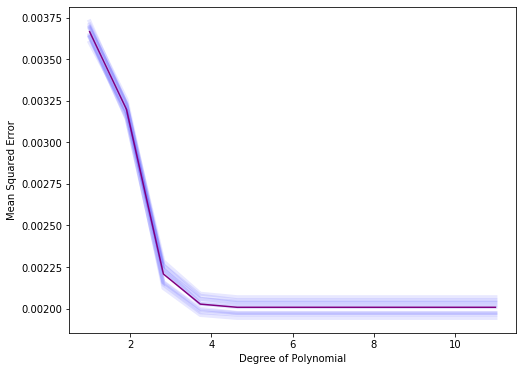

In [25]:
kfold_CV(df_testX)